In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import linregress

In [2]:
def get_data(filename="parallel.csv",
            data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"):
    data = pd.read_csv(data_dir + filename, sep=";").to_numpy() # .groupby("realization")
    #print(data)
    print(f"Shape = {data.shape}, Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]")
    print(f"Number of realizations = {data[-1,0]}")
    
    iterations = len(np.unique(data[:,0]))
    data = np.array([data[data[:,0]==i] for i in range(iterations)]) # contains shape=(realizations, it/re, values)
    print(f"Reshaped = {data.shape}\n")
    return data

def getDTs(data):
    time    = data[0,:,1]
    T_perp  = data[...,3]
    T_par   = data[...,2]
    dT      = (T_perp - T_par) 
    for i in range(dT.shape[0]): # normalize
        dT[i] /= dT[i,0]
    return dT, T_perp, T_par, time

Shape = (34, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 0.0
Reshaped = (1, 34, 5)

Shape = (34, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 0.0
Reshaped = (1, 34, 5)



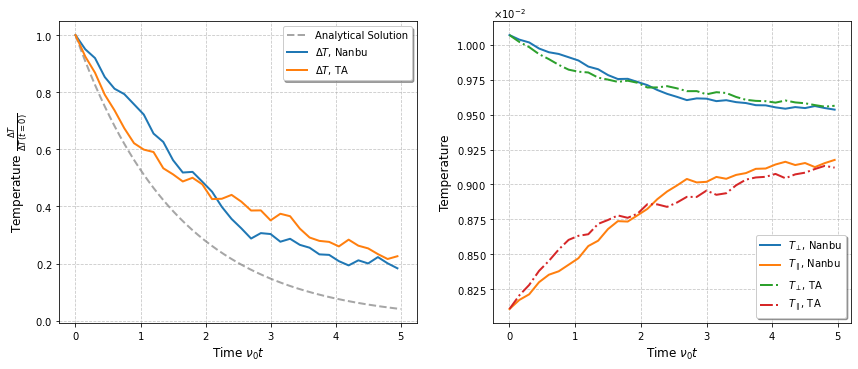

In [11]:
dataNanbu = get_data(filename="1_Nanbu_convergence_parallel20000.csv",
               data_dir="data/convergence/")
dataTA = get_data(filename="1_TakAbe_convergence_parallel20000.csv",
               data_dir="data/convergence/")
dT_Nanbu, T_perp_Nanbu, T_par_Nanbu, time = getDTs(dataNanbu)
dT_TA, T_perp_TA, T_par_TA, time          = getDTs(dataTA)


tau        = 5/8 * np.sqrt(2*np.pi)
master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

# Fill between dT_mean ± dT_std
#plt.fill_between(time, dT_mean - dT_std, dT_mean + dT_std, color='blue', alpha=0.2, label='dT Std Dev')

import matplotlib.ticker as ticker

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
ax1.plot(master_tim, master_sol, "--", label="Analytical Solution", linewidth=2, alpha=0.7, c="grey")
ax1.plot(time, dT_Nanbu[0,:], label="$\\Delta T$, Nanbu", linewidth=2)
ax1.plot(time, dT_TA[0,:], label="$\\Delta T$, TA", linewidth=2)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc="best", frameon=True, fancybox=True, shadow=True)
ax1.set_xlabel('Time $\\nu_0t$', fontsize=12)
ax1.set_ylabel('Temperature $\\frac{\\Delta T}{\\Delta T(t=0)}$', fontsize=12)
# ax1.set_title('$\\Delta T$ over Time', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=10)

# Second subplot
ax2.plot(time, T_perp_Nanbu[0,:], label="$T_\\perp$, Nanbu", linewidth=2)
ax2.plot(time, T_par_Nanbu[0,:], label="$T_\\parallel$, Nanbu", linewidth=2)
ax2.plot(time, T_perp_TA[0,:], label="$T_\\perp$, TA", linewidth=2, linestyle="dashdot")
ax2.plot(time, T_par_TA[0,:], label="$T_\\parallel$, TA", linewidth=2, linestyle="dashdot")
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc="best", frameon=True, fancybox=True, shadow=True)
ax2.set_xlabel('Time $\\nu_0t$', fontsize=12)
ax2.set_ylabel('Temperature', fontsize=12)
# ax2.set_title('$T_\\perp$ and $T_\\parallel$ over Time', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Adjust layout and add a main title
plt.tight_layout()
# fig.suptitle('Anisotropic Temperature Evolution, $N=20000$, $\\nu_0\Delta t = 0.15$', fontsize=16, y=1.05)

# Ensure scientific notation is used when necessary
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', scilimits=(-2,3), axis='both')

# Save the figure (optional)
plt.savefig('plots/anisotropic_T_example.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Shape = (1002000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 501, 5)

Shape = (202000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 101, 5)

Shape = (102000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 51, 5)

Shape = (34000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 17, 5)

Shape = (22000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 11, 5)

Shape = (1002000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 501, 5)

Shape = (202000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 101, 5)

Shape = (102000, 5), Coulomns = [Realization

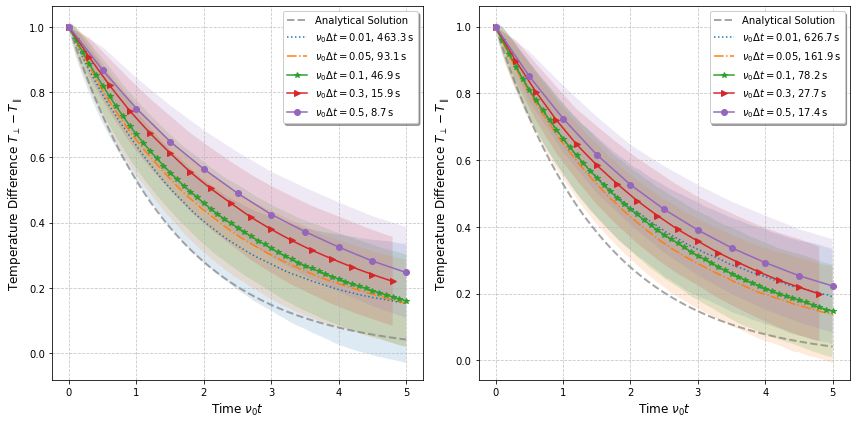

In [4]:
tau        = 5/8 * np.sqrt(2*np.pi)
master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

files_TA = ["2_0.01TakAbe_convergence_parallel3200.csv", # 1000 realizations, 140.5s
            "2_0.05TakAbe_convergence_parallel3200.csv", # 29.4s
            "2_0.1TakAbe_convergence_parallel3200.csv", # 14.1s
            "2_0.3TakAbe_convergence_parallel3200.csv", # 4.5s
            "2_0.5TakAbe_convergence_parallel3200.csv"] # 8.7s

labels_TA = ["$\\nu_0\\Delta t = 0.01$, $463.3\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.05$, $93.1\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.1$, $46.9\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.3$, $15.9\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.5$, $8.7\\,\\mathrm{s}$"]

files_N = ["2_0.01Nanbu_convergence_parallel3200.csv", 
           "2_0.05Nanbu_convergence_parallel3200.csv", 
           "2_0.1Nanbu_convergence_parallel3200.csv", 
           "2_0.3Nanbu_convergence_parallel3200.csv", 
           "2_0.5Nanbu_convergence_parallel3200.csv"] 

labels_N = ["$\\nu_0\\Delta t = 0.01$, $626.7\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.05$, $161.9\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.1$, $78.2\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.3$, $27.7\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.5$, $17.4\\,\\mathrm{s}$"]


master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

all_dT_mean_TA = []
all_dT_std_TA  = []
all_times_TA   = []

# Iterate through each file
for path in files_TA:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_TA.append(dT_mean)
    all_dT_std_TA.append(dT_std)
    all_times_TA.append(time)
    
all_dT_mean_N = []
all_dT_std_N  = []
all_times_N   = []

# Iterate through each file
for path in files_N:
    data = get_data(filename=path, data_dir="data/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_N.append(dT_mean)
    all_dT_std_N.append(dT_std)
    all_times_N.append(time)
 



# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first subplot
ax1.plot(master_tim, master_sol, "--", label="Analytical Solution", linewidth=2, alpha=0.7, color="grey")

markers = [":", "-.", "-*", "->", "-o"]
for i, dT_mean in enumerate(all_dT_mean_TA):
    dT_std = all_dT_std_TA[i]
    time = all_times_TA[i]
    ax1.plot(time, dT_mean, markers[i], label=labels_TA[i])
    # Uncomment the line below if you want to include the shaded area for standard deviation
    ax1.fill_between(time, dT_mean - dT_std, dT_mean + dT_std, alpha=0.15)

ax1.set_xlabel('Time $\\nu_0t$', fontsize=12)
ax1.set_ylabel('Temperature Difference $T_\\perp-T_\\parallel$', fontsize=12)
#ax1.set_title('TA Method, $N=3200$, $2000$ Realizations', fontsize=14)
ax1.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=10)

# Plotting the second subplot (you can modify this for another dataset if needed)
ax2.plot(master_tim, master_sol, "--", label="Analytical Solution", linewidth=2, alpha=0.7, color="grey")

for i, dT_mean in enumerate(all_dT_mean_N):
    dT_std = all_dT_std_N[i]
    time = all_times_N[i]
    ax2.plot(time, dT_mean, markers[i], label=labels_N[i])
    # Uncomment the line below if you want to include the shaded area for standard deviation
    ax2.fill_between(time, dT_mean - dT_std, dT_mean + dT_std, alpha=0.15)

ax2.set_xlabel('Time $\\nu_0t$', fontsize=12)
ax2.set_ylabel('Temperature Difference $T_\\perp-T_\\parallel$', fontsize=12)
#ax2.set_title('Nanbu Method, $N=3200$, $2000$ Realizations', fontsize=14)
ax2.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Adjust layout and add a main title
plt.tight_layout()
#fig.suptitle('Time Step Size Analysis', fontsize=16, y=1.05)

# Save the plot (optional)
plt.savefig('plots/temperature_diff_dT_combined_shaded.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_pa

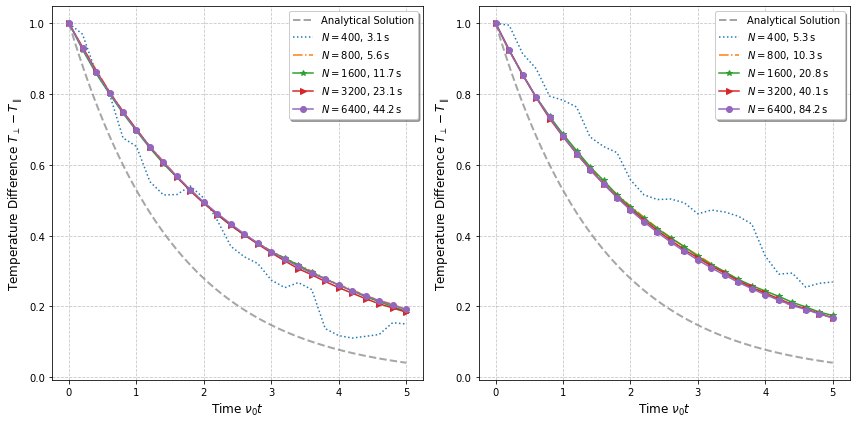

In [8]:
tau        = 5/8 * np.sqrt(2*np.pi)
master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

files_TA = ["3_TakAbe_convergence_parallel400.csv", # 1000 realizations, 140.5s
            "3_TakAbe_convergence_parallel800.csv", # 29.4s
            "3_TakAbe_convergence_parallel1600.csv", # 14.1s
            "3_TakAbe_convergence_parallel3200.csv", # 4.5s
            "3_TakAbe_convergence_parallel6400.csv"] # 8.7s

labels_TA = ["$N = 400$, $3.1\\,\\mathrm{s}$",
             "$N = 800$, $5.6\\,\\mathrm{s}$",
             "$N = 1600$, $11.7\\,\\mathrm{s}$",
             "$N = 3200$, $23.1\\,\\mathrm{s}$",
             "$N = 6400$, $44.2\\,\\mathrm{s}$"]

files_N = ["3_Nanbu_convergence_parallel400.csv", 
           "3_Nanbu_convergence_parallel800.csv", 
           "3_Nanbu_convergence_parallel1600.csv", 
           "3_Nanbu_convergence_parallel3200.csv", 
           "3_Nanbu_convergence_parallel6400.csv"] 

labels_N = ["$N = 400$, $5.3\\,\\mathrm{s}$",
            "$N = 800$, $10.3\\,\\mathrm{s}$",
            "$N = 1600$, $20.8\\,\\mathrm{s}$",
            "$N = 3200$, $40.1\\,\\mathrm{s}$",
            "$N = 6400$, $84.2\\,\\mathrm{s}$"]

master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

all_dT_mean_TA = []
all_dT_std_TA  = []
all_times_TA   = []

# Iterate through each file
for path in files_TA:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_TA.append(dT_mean)
    all_dT_std_TA.append(dT_std)
    all_times_TA.append(time)
    
all_dT_mean_N = []
all_dT_std_N  = []
all_times_N   = []

# Iterate through each file
for path in files_N:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_N.append(dT_mean)
    all_dT_std_N.append(dT_std)
    all_times_N.append(time)
 



# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first subplot
ax1.plot(master_tim, master_sol, "--", label="Analytical Solution", linewidth=2, alpha=0.7, color="grey")

markers = [":", "-.", "-*", "->", "-o"]
for i, dT_mean in enumerate(all_dT_mean_TA):
    dT_std = all_dT_std_TA[i]
    time = all_times_TA[i]
    ax1.plot(time, dT_mean, markers[i], label=labels_TA[i])
    # Uncomment the line below if you want to include the shaded area for standard deviation
    #ax1.fill_between(time, dT_mean - dT_std, dT_mean + dT_std, alpha=0.15)

ax1.set_xlabel('Time $\\nu_0t$', fontsize=12)
ax1.set_ylabel('Temperature Difference $T_\\perp-T_\\parallel$', fontsize=12)
#ax1.set_title('TA Method, $N=3200$, $2000$ Realizations', fontsize=14)
ax1.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=10)

# Plotting the second subplot (you can modify this for another dataset if needed)
ax2.plot(master_tim, master_sol, "--", label="Analytical Solution", linewidth=2, alpha=0.7, color="grey")

for i, dT_mean in enumerate(all_dT_mean_N):
    dT_std = all_dT_std_N[i]
    time = all_times_N[i]
    ax2.plot(time, dT_mean, markers[i], label=labels_N[i])
    # Uncomment the line below if you want to include the shaded area for standard deviation
    #ax2.fill_between(time, dT_mean - dT_std, dT_mean + dT_std, alpha=0.15)

ax2.set_xlabel('Time $\\nu_0t$', fontsize=12)
ax2.set_ylabel('Temperature Difference $T_\\perp-T_\\parallel$', fontsize=12)
#ax2.set_title('Nanbu Method, $N=3200$, $2000$ Realizations', fontsize=14)
ax2.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Adjust layout and add a main title
plt.tight_layout()
#fig.suptitle('Particle Number Analysis', fontsize=16, y=1.05)

# Save the plot (optional)
plt.savefig('plots/temperature_diff_N_combined.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Shape = (1002000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 501, 5)

Shape = (202000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 101, 5)

Shape = (102000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 51, 5)

Shape = (34000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 17, 5)

Shape = (22000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 11, 5)

Shape = (1002000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 501, 5)

Shape = (202000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 101, 5)

Shape = (102000, 5), Coulomns = [Realization

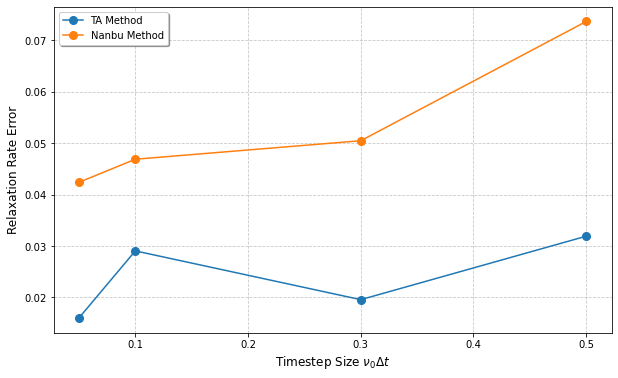

In [6]:
tau        = 5/8 * np.sqrt(2*np.pi)
master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

files_TA = ["2_0.01TakAbe_convergence_parallel3200.csv", # 1000 realizations, 140.5s
            "2_0.05TakAbe_convergence_parallel3200.csv", # 29.4s
            "2_0.1TakAbe_convergence_parallel3200.csv", # 14.1s
            "2_0.3TakAbe_convergence_parallel3200.csv", # 4.5s
            "2_0.5TakAbe_convergence_parallel3200.csv"] # 8.7s

labels_TA = ["$\\nu_0\\Delta t = 0.01$, $463.3\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.05$, $93.1\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.1$, $46.9\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.3$, $15.9\\,\\mathrm{s}$",
             "$\\nu_0\\Delta t = 0.5$, $8.7\\,\\mathrm{s}$"]

files_N = ["2_0.01Nanbu_convergence_parallel3200.csv", 
           "2_0.05Nanbu_convergence_parallel3200.csv", 
           "2_0.1Nanbu_convergence_parallel3200.csv", 
           "2_0.3Nanbu_convergence_parallel3200.csv", 
           "2_0.5Nanbu_convergence_parallel3200.csv"] 

labels_N = ["$\\nu_0\\Delta t = 0.01$, $626.7\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.05$, $161.9\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.1$, $78.2\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.3$, $27.7\\,\\mathrm{s}$",
            "$\\nu_0\\Delta t = 0.5$, $17.4\\,\\mathrm{s}$"]

timestepsizes = [0.01, 0.05, 0.1, 0.3, 0.5]


master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

all_dT_mean_TA = []
all_dT_std_TA  = []
all_times_TA   = []

# Iterate through each file
for path in files_TA:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_TA.append(dT_mean)
    all_dT_std_TA.append(dT_std)
    all_times_TA.append(time)
    
all_dT_mean_N = []
all_dT_std_N  = []
all_times_N   = []

# Iterate through each file
for path in files_N:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_N.append(dT_mean)
    all_dT_std_N.append(dT_std)
    all_times_N.append(time)

    
analytical_rate = 0.517892 # 0.638307

def calculate_convergence_rate(all_dT_mean, timestep_sizes):
    rates = []
    for time, dT_mean in zip(timestep_sizes, all_dT_mean):
        # Taking logarithm of the mean values and timestep sizes
        log_mean = np.log(dT_mean[1:])
        log_timestep = np.log(time[1:])
        
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(log_timestep, log_mean)
        rates.append(-slope)  # Append the slope (rate of convergence)
    return np.array(rates)

rates_TA = calculate_convergence_rate(all_dT_mean_TA, all_times_TA)
rates_N = calculate_convergence_rate(all_dT_mean_N, all_times_N)

rates_TA = np.abs(analytical_rate - rates_TA)
rates_N = np.abs(analytical_rate - rates_N)

# Plotting the rates of convergence against timestep sizes
plt.figure(figsize=(10, 6))

# Plot for TA Method
plt.plot(timestepsizes[1:], rates_TA[1:], 'o-', label='TA Method', markersize=8)

# Plot for N Method
plt.plot(timestepsizes[1:], rates_N[1:], 'o-', label='Nanbu Method', markersize=8)

# Set log scale for x-axis
# plt.xscale('log')
# plt.yscale('log')

# Labels and title
plt.xlabel('Timestep Size $\\nu_0\\Delta t$', fontsize=12)
plt.ylabel('Relaxation Rate Error', fontsize=12)
#plt.title('Convergence of the Relaxation Rate', fontsize=14)
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot (optional)
plt.savefig('plots/relaxation_rate_convergence.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

    

In [242]:
print(np.polyfit(np.log(timestepsizes[1:]), np.log(rates_TA[1:]), deg=1))
print(np.polyfit(np.log(timestepsizes[1:]), np.log(rates_N[1:]), deg=1))

x1, x2 = np.log(timestepsizes[1]), np.log(timestepsizes[-1])
y1, y2 = np.log(rates_TA[:]), np.log(rates_TA[:])
print((y2-y1)/(x2-x1))

[ 0.1785932  -3.44210146]
[ 0.20368986 -2.58735101]
[0. 0. 0. 0. 0.]


Shape = (1002000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 501, 5)

Shape = (202000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 101, 5)

Shape = (102000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 51, 5)

Shape = (34000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 17, 5)

Shape = (22000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 11, 5)

Shape = (1002000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 501, 5)

Shape = (202000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 101, 5)

Shape = (102000, 5), Coulomns = [Realization

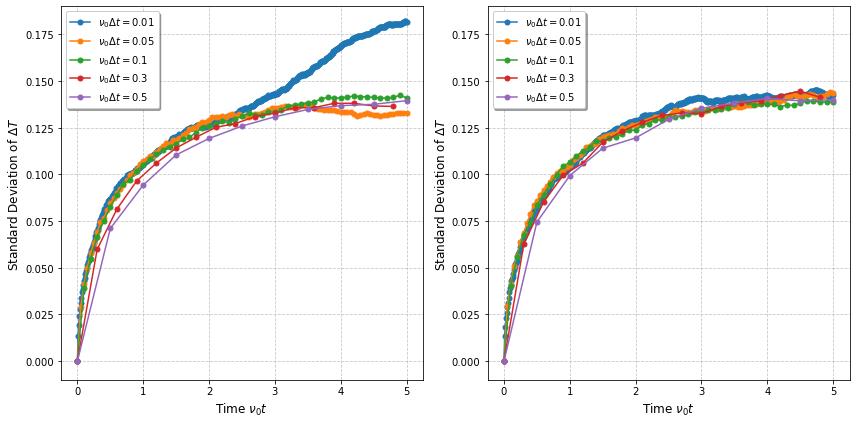

In [7]:
tau        = 5/8 * np.sqrt(2*np.pi)
master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

files_TA = ["2_0.01TakAbe_convergence_parallel3200.csv", # 1000 realizations, 140.5s
            "2_0.05TakAbe_convergence_parallel3200.csv", # 29.4s
            "2_0.1TakAbe_convergence_parallel3200.csv", # 14.1s
            "2_0.3TakAbe_convergence_parallel3200.csv", # 4.5s
            "2_0.5TakAbe_convergence_parallel3200.csv"] # 8.7s

labels_TA = ["$\\nu_0\\Delta t = 0.01$",
             "$\\nu_0\\Delta t = 0.05$",
             "$\\nu_0\\Delta t = 0.1$",
             "$\\nu_0\\Delta t = 0.3$",
             "$\\nu_0\\Delta t = 0.5$"]

files_N = ["2_0.01Nanbu_convergence_parallel3200.csv", 
           "2_0.05Nanbu_convergence_parallel3200.csv", 
           "2_0.1Nanbu_convergence_parallel3200.csv", 
           "2_0.3Nanbu_convergence_parallel3200.csv", 
           "2_0.5Nanbu_convergence_parallel3200.csv"] 

labels_N = ["$\\nu_0\\Delta t = 0.01$",
            "$\\nu_0\\Delta t = 0.05$",
            "$\\nu_0\\Delta t = 0.1$",
            "$\\nu_0\\Delta t = 0.3$",
            "$\\nu_0\\Delta t = 0.5$"]

timestepsizes = [0.01, 0.05, 0.1, 0.3, 0.5]


master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

all_dT_mean_TA = []
all_dT_std_TA  = []
all_times_TA   = []

# Iterate through each file
for path in files_TA:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_TA.append(dT_mean)
    all_dT_std_TA.append(dT_std)
    all_times_TA.append(time)
    
all_dT_mean_N = []
all_dT_std_N  = []
all_times_N   = []

# Iterate through each file
for path in files_N:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_N.append(dT_mean)
    all_dT_std_N.append(dT_std)
    all_times_N.append(time)

    

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting for TA Method
for i, dT_std in enumerate(all_dT_std_TA):
    time = all_times_TA[i]
    ax1.plot(all_times_TA[i], dT_std, marker='o', label=labels_TA[i], markersize=5)

ax1.set_xlabel('Time $\\nu_0 t$', fontsize=12)
ax1.set_ylabel('Standard Deviation of $\\Delta T$', fontsize=12)
#ax1.set_title('TA Method', fontsize=14)
ax1.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_ylim((-0.01, 0.19))

# Plotting for N Method
for i, dT_std in enumerate(all_dT_std_N):
    time = all_times_N[i]
    ax2.plot(all_times_N[i], dT_std, marker='o', label=labels_N[i], markersize=5)

ax2.set_xlabel('Time $\\nu_0 t$', fontsize=12)
ax2.set_ylabel('Standard Deviation of $\\Delta T$', fontsize=12)
#ax2.set_title('Nanbu Method', fontsize=14)
ax2.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_ylim((-0.01, 0.19))

# Adjust layout and add a main title
plt.tight_layout()
#fig.suptitle('$\\Delta T$ Standard Deviation Comparison in $\\nu_0\\Delta t$', fontsize=16, y=1.05)

# Save the plot (optional)
plt.savefig('plots/temperature_std_dt_comparison.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

    

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 1999.0
Reshaped = (2000, 26, 5)

Shape = (52000, 5), Coulomns = [Realization, Time, v_pa

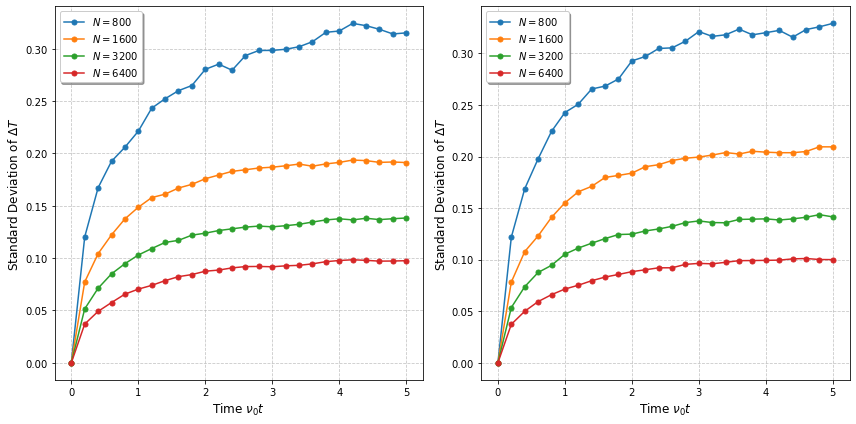

In [9]:
tau        = 5/8 * np.sqrt(2*np.pi)
master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

files_TA = ["3_TakAbe_convergence_parallel400.csv", # 1000 realizations, 140.5s
            "3_TakAbe_convergence_parallel800.csv", # 29.4s
            "3_TakAbe_convergence_parallel1600.csv", # 14.1s
            "3_TakAbe_convergence_parallel3200.csv", # 4.5s
            "3_TakAbe_convergence_parallel6400.csv"] # 8.7s

labels_TA = ["$N = 400$",
             "$N = 800$",
             "$N = 1600$",
             "$N = 3200$",
             "$N = 6400$"]

files_N = ["3_Nanbu_convergence_parallel400.csv", 
           "3_Nanbu_convergence_parallel800.csv", 
           "3_Nanbu_convergence_parallel1600.csv", 
           "3_Nanbu_convergence_parallel3200.csv", 
           "3_Nanbu_convergence_parallel6400.csv"] 

labels_N = ["$N = 400$",
            "$N = 800$",
            "$N = 1600$",
            "$N = 3200$",
            "$N = 6400$"]




master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

all_dT_mean_TA = []
all_dT_std_TA  = []
all_times_TA   = []

# Iterate through each file
for path in files_TA:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_TA.append(dT_mean)
    all_dT_std_TA.append(dT_std)
    all_times_TA.append(time)
    
all_dT_mean_N = []
all_dT_std_N  = []
all_times_N   = []

# Iterate through each file
for path in files_N:
    data = get_data(filename=path, data_dir="data/convergence/")
    time = data[0, :, 1]
    T_perp = data[..., 3]
    T_par = data[..., 2]
    dT = (T_perp - T_par)
    
    # Normalize dT
    for i in range(dT.shape[0]):
        dT[i] /= dT[i, 0]
    
    # Calculate mean and std deviation
    dT_mean = dT.mean(axis=0)
    dT_std = dT.std(axis=0)
    
    # Store the results
    all_dT_mean_N.append(dT_mean)
    all_dT_std_N.append(dT_std)
    all_times_N.append(time)

    

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting for TA Method
for i, dT_std in enumerate(all_dT_std_TA):
    if i == 0: continue
    time = all_times_TA[i]
    ax1.plot(all_times_TA[i], dT_std, marker='o', label=labels_TA[i], markersize=5)

ax1.set_xlabel('Time $\\nu_0 t$', fontsize=12)
ax1.set_ylabel('Standard Deviation of $\\Delta T$', fontsize=12)
#ax1.set_title('TA Method', fontsize=14)
ax1.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=10)
#ax1.set_ylim((-0.01, 0.19))

# Plotting for N Method
for i, dT_std in enumerate(all_dT_std_N):
    if i == 0: continue
    time = all_times_N[i]
    ax2.plot(all_times_N[i], dT_std, marker='o', label=labels_N[i], markersize=5)

ax2.set_xlabel('Time $\\nu_0 t$', fontsize=12)
ax2.set_ylabel('Standard Deviation of $\\Delta T$', fontsize=12)
#ax2.set_title('Nanbu Method', fontsize=14)
ax2.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', which='major', labelsize=10)
#ax2.set_ylim((-0.01, 0.19))

# Adjust layout and add a main title
plt.tight_layout()
#fig.suptitle('$\\Delta T$ Standard Deviation Comparison in $N$', fontsize=16, y=1.05)

# Save the plot (optional)
plt.savefig('plots/temperature_std_N_comparison.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

    

[-1.00770495  1.51163564]
[-0.92438756  2.23125687]


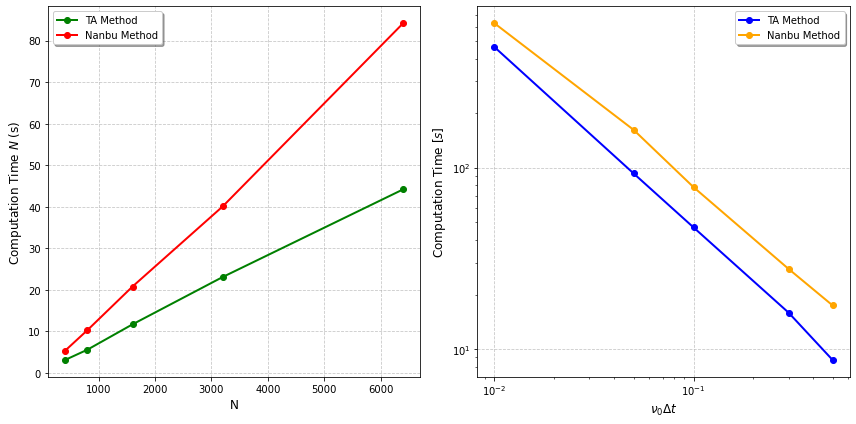

In [10]:
N = [6400, 3200, 1600, 800, 400]
dt = [0.01, 0.05, 0.1, 0.3, 0.5]

dt_TA = [463.3, 93.1, 46.9, 15.9, 8.7]
dt_N  = [626.7, 161.9, 78.2, 27.7, 17.4]

N_TA = [44.2, 23.1, 11.7, 5.6, 3.1] 
N_N  = [84.2, 40.1, 20.8, 10.3, 5.3]

print(np.polyfit(np.log(dt), np.log(dt_TA), deg=1))
print(np.polyfit(np.log(dt), np.log(dt_N), deg=1))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting for N vs N
ax1.plot(N, N_TA, marker='o', color='green', linestyle='-', linewidth=2, markersize=6, label='TA Method')
ax1.plot(N, N_N, marker='o', color='red', linestyle='-', linewidth=2, markersize=6, label='Nanbu Method')
ax1.set_xlabel('N', fontsize=12)
ax1.set_ylabel('Computation Time $N$ (s)', fontsize=12)
#ax1.set_title('Computation Time vs N', fontsize=14)
ax1.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plotting for dt vs N
ax2.plot(dt, dt_TA, marker='o', color='blue', linestyle='-', linewidth=2, markersize=6, label='TA Method')
ax2.plot(dt, dt_N, marker='o', color='orange', linestyle='-', linewidth=2, markersize=6, label='Nanbu Method')

#x_values = np.linspace(min(dt), max(dt), 100)
#y_values = -1.0 * x_values
#ax2.plot(x_values, y_values, linestyle='--', color='grey', label='1st Order Reference')

ax2.set_xlabel('$\\nu_0 \\Delta t$', fontsize=12)
ax2.set_ylabel('Computation Time $[s]$', fontsize=12)
#ax2.set_title('Computation Time vs $\\nu_0 \\Delta t$', fontsize=14)
ax2.legend(loc='best', frameon=True, fancybox=True, shadow=True)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_yscale("log")
ax2.set_xscale("log")

# Adjust layout and add a main title
plt.tight_layout()
#fig.suptitle('Single Threaded Computation Time Analysis', fontsize=16, y=1.02)

# Save the plot (optional)
plt.savefig('plots/computation_time_analysis_single_combined.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


The following is just random testing...

Shape = (500500, 5), Coulomns = [Realization, Time, v_parallel_sq, v_perp_sq]
Number of realizations = 499.0
Reshaped = (500, 1001, 5)

0.03109802771584295 117.68030136819887 1.566642671644375 0.22057794371706518


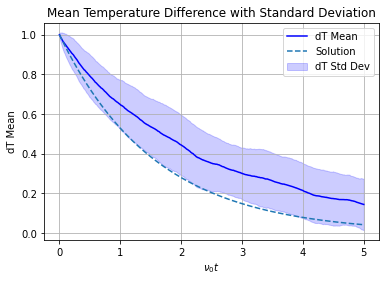

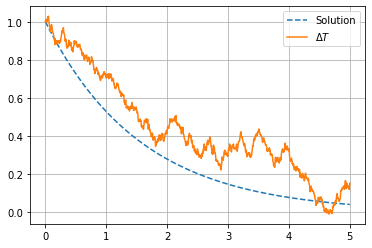

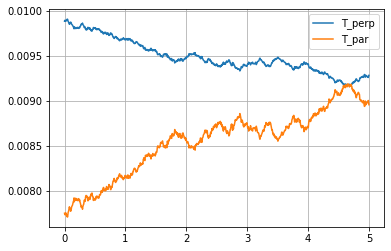

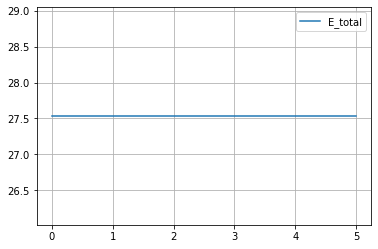

In [178]:
method     = "TakAbe" # Nanbu
testcase   = "convergence"
NParticles = 2000 # 200
data = get_data(filename=f"{method}_{testcase}_parallel{NParticles}.csv")

time    = data[0,:,1]
T_perp  = data[...,3]
T_par   = data[...,2]
dT      = (T_perp - T_par) 
for i in range(dT.shape[0]): # normalize
    dT[i] /= dT[i,0]
dT_mean = dT.mean(axis=0)
dT_std  = dT.std(axis=0)

T_total    = 0.008/3 + 2*0.01/3
rho        = 0.768 # 0.768 eV^3 = 10^18m^-3 in natural units # NParticles # 1.4854461e-5
lnL        = np.sqrt(T_total / (4*np.pi*rho)) # 23 - np.log(np.sqrt(rho*1.3e12)*T_total**(-1.5)); # # np.sqrt(T_total / (4*np.pi*rho)) 
nu0        = np.pi*np.sqrt(2)*rho*lnL/T_total**1.5

sgm = rho*lnL / (8*np.pi/4*0.25**3) * 0.2

tau        = 5/8 * np.sqrt(2*np.pi) 
print(lnL, nu0, tau, np.sqrt(sgm))

master_tim = np.linspace(0, 5.0, 200) # already includes "nu0"
master_sol = np.exp(-master_tim/tau)

# Plotting
plt.figure() # figsize=(10, 6)
plt.plot(time, dT_mean, color='blue', label='dT Mean')
plt.plot(master_tim, master_sol, "--", label="Solution")

# Fill between dT_mean ± dT_std
plt.fill_between(time, dT_mean - dT_std, dT_mean + dT_std, color='blue', alpha=0.2, label='dT Std Dev')

# Adding labels and title
plt.xlabel('$\\nu_0 t$')
plt.ylabel('dT Mean')
plt.title('Mean Temperature Difference with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(master_tim, master_sol, "--", label="Solution")
plt.plot(time, dT[0,:], label="$\\Delta T$")
plt.grid(True)
plt.legend(loc="best")
plt.show()

plt.figure()
plt.plot(time, T_perp[0,:], label="T_perp")
plt.plot(time, T_par[0,:], label="T_par")
plt.grid(True)
plt.legend(loc="best")
plt.show()

plt.figure()
plt.plot(time, data[0,:,4], label="E_total")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [85]:
import numpy as np

# Given parameters
T_parallel = 0.008  # specify T_parallel
T_perp = 0.01      # specify T_perp
m = 1.0           # specify mass

# Number of samples
N = 200  # for example

# Standard deviations
sigma_x = np.sqrt(T_parallel**2 / m)
sigma_yz = np.sqrt(T_perp**2 / m)

# Generate samples
v_x = np.random.normal(0, np.sqrt(sigma_x), N)
v_y = np.random.normal(0, np.sqrt(sigma_yz), N)
v_z = np.random.normal(0, np.sqrt(sigma_yz), N)

# Combine into velocity vectors
velocities = np.column_stack((v_x, v_y, v_z))


# Calculate parallel temperature
T_parallel_calc = np.mean(v_x**2) * m

# Calculate perpendicular temperature
T_perp_calc = np.mean(v_y**2 + v_z**2) * m / 2

print("Calculated T_parallel:", T_parallel_calc)
print("Calculated T_perp:", T_perp_calc)


va, vb = velocities[10], velocities[77]
print(np.linalg.norm(va-vb))
    


Calculated T_parallel: 0.008363172067201914
Calculated T_perp: 0.010384675712485882
0.10177020330790638
